In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file1 = '/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/bandas/50/BAND.OUT'
file2 = '/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/bandas/50/BANDLINES.OUT'

In [3]:
bandas_file = np.loadtxt(file1)
high_energy_points_file = np.loadtxt(file2)

In [4]:
bandas = pd.DataFrame(bandas_file, columns=['x','y'])
high_energy_points = pd.DataFrame(high_energy_points_file, columns=['x','y'])

In [5]:
bandas

,x,y
0,0.000000,-2.277230
1,0.010256,-2.277227
2,0.020512,-2.277220
3,0.030768,-2.277208
4,0.041024,-2.277190
...,...,...
16395,4.074109,1.942006
16396,4.084491,1.941565
16397,4.094874,1.941589
16398,4.105257,1.941614


# Plotting the first band

In [6]:
bandas_x = bandas.x[:400]
bandas['y'] = bandas['y'].apply(lambda x: x * 27.2)
bandas.y

0       -61.940647
1       -61.940580
2       -61.940380
3       -61.940046
4       -61.939579
           ...    
16395    52.822555
16396    52.810564
16397    52.811217
16398    52.811891
16399    52.812163
Name: y, Length: 16400, dtype: float64

In [7]:
lista = [(i,i) for i in high_energy_points.x]
lista = list(set(lista))
lista

[(0.0, 0.0),
 (3.357706506, 3.357706506),
 (4.115639195, 4.115639195),
 (2.322351198, 2.322351198),
 (0.656388963, 0.656388963),
 (2.978740161, 2.978740161),
 (1.793287996, 1.793287996),
 (1.035355307, 1.035355307)]

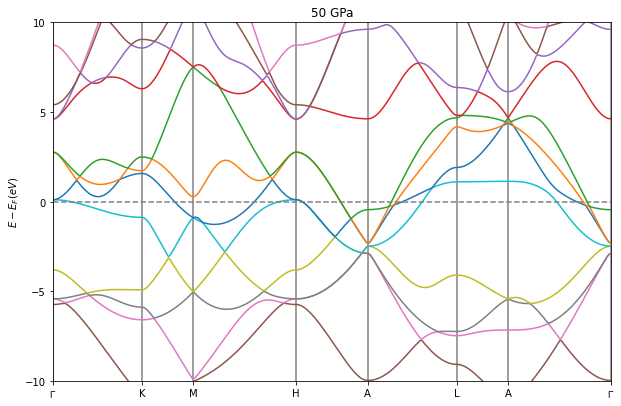

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6.6)
plt.ylim(-10, 10)
plt.xlim(0,bandas.x.max())
for i in range(len(lista)):
    ax.plot(lista[i],[high_energy_points.y[0]*27.2,high_energy_points.y[1]*27.2 ], c='gray')
for i in range(int(len(bandas.y.values.reshape(-1,1)) / 400)):
    inicio = i * 400
    fin = (i+1) * 400
    ax.plot(bandas_x,bandas.y[inicio : fin])
ax.plot([0,bandas.x.max()],[0,0],'--', c='gray')
ax.plot(bandas_x, bandas.y[:400])
ax.set_xticks(ticks=[lista[i][0] for i in range(len(lista))])
ax.set_xticklabels([r"$\mathbb{\Gamma}$",r"A",r"$\mathbb{\Gamma}$",r"A",r"K",r"L",r"H",r"M"])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylabel(r"$E-E_{F}(eV)$")
ax.set_title('50 GPa')
plt.savefig('BANDS.png')
plt.show()